# Building Priors for $a_{\rm dg}$

In [26]:
# imports
import os
from importlib import reload
import numpy as np

from scipy.io import matlab

import seaborn as sns
from matplotlib import pyplot as plt

from ocpy.hydrolight import loisel23
from ocpy.utils import plotting

from bing import rt

In [2]:
%matplotlib ipympl

# Load up Spectra from Kehrli+2024

In [5]:
dfile = os.path.join(os.getenv('OS_COLOR'), 'data', 'Kehrli2024', 'ADG_part_data_fig2_spec.mat')
d = matlab.loadmat(dfile)

## Inspect

In [13]:
d.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ag', 'ad', '__function_workspace__'])

# Parse $a_g$

In [17]:
d['ag'].dtype

dtype([('Lambda', 'O'), ('ag', 'O'), ('Cruise', 'O'), ('LatN', 'O'), ('LonE', 'O'), ('DateNum', 'O'), ('Depth', 'O')])

In [20]:
d['ag']['Lambda'][0][0].shape

(1, 351)

In [11]:
d['ag']['ag'][0][0].shape

(1293, 351)

## Unpack

In [24]:
ag_wave =  d['ag']['Lambda'][0][0][0].astype(float)
ag_wave.size

351

In [25]:
ag =  d['ag']['ag'][0][0]

## Plot a few

In [28]:
idxs = np.random.choice(ag.shape[0], size=10, replace=False)

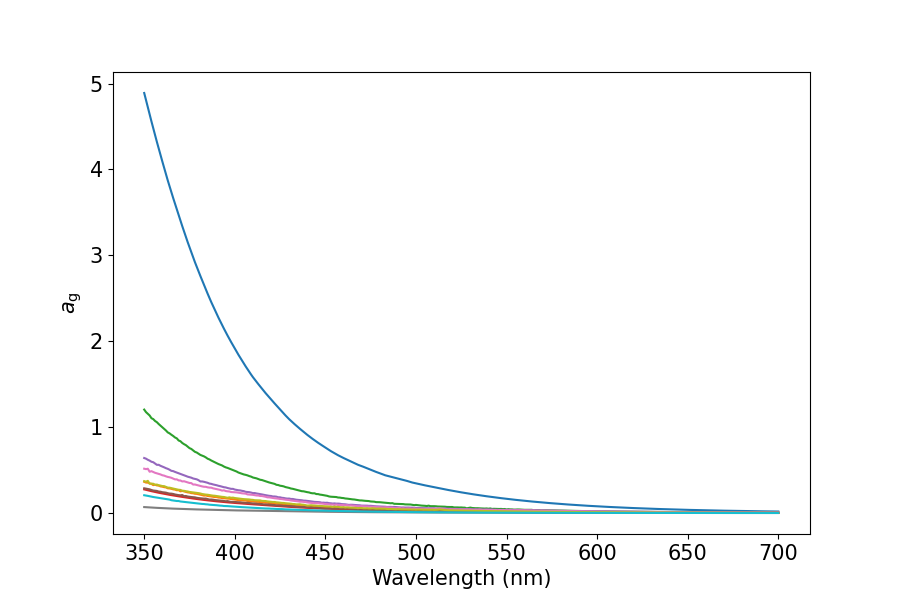

In [29]:
fig = plt.figure(figsize=(9,6))
ax = plt.gca()
for idx in idxs:
    ax.plot(ag_wave, ag[idx])
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$a_{\rm g}$')
#
plotting.set_fontsize(ax, 15)
#
plt.show()

# $a_d$

In [33]:
ad_wave =  d['ad']['Lambda'][0][0][0].astype(float)
ad =  d['ad']['ad'][0][0]
ad.shape

(521, 351)

In [32]:
idxs = np.random.choice(ad.shape[0], size=10, replace=False)

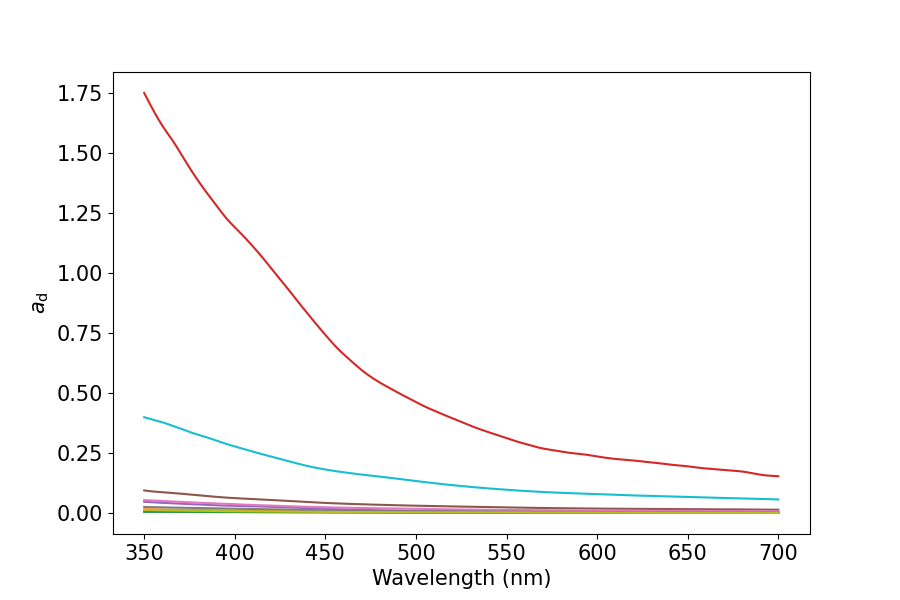

In [34]:
fig = plt.figure(figsize=(9,6))
ax = plt.gca()
for idx in idxs:
    ax.plot(ad_wave, ad[idx])
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$a_{\rm d}$')
#
plotting.set_fontsize(ax, 15)
#
plt.show()